# Tarea 4 $\quad\color{red}{\text{Calificación: }}$

In [1]:
# Librerías a utilizar:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Ejercicio 1

El siguiente modelo describe el cambio de población de conejos $c(t)$ a causa de los lobos $l(t)$ a través del tiempo $t$:

$$ \frac{dc(t)}{dt}= 4c(t)-2l(t)$$

$$\frac{dl(t)}{dt}=c(t)+l(t) $$

Resolver por métodos numércios este sistema de EDOs y graficar la solución.

## Utilizamos Diferencias Finitas
$$\bar{y}_{n+1}=\bar{y_n}+h \text{ } \bar{f}(t_n, y_n)$$

In [2]:
# Intervalo de tiempo [0,10]
t0=0
tf=10

# número de pasos
n=100

# Condiciones iniciales
c0=2.0
l0=1.5

# Tamaño del paso
h = (tf-t0)/n

t = np.linspace(t0, tf, n+1)
c = np.zeros(n+1)
l = np.zeros(n+1)

c[0] = c0
l[0] = l0

for i in range(0,n):
    c[i+1] = c[i] + h*(4 * c[i] - 2 * l[i])
    l[i+1] = l[i] + h*(c[i] + l[i])


print("Tiempo","Aproximación c(t) ","Aproximación l(t) ")
for i in range(n+1):
    print ("%6.2f %6.2f %6.2f" % (t[i], c[i], l[i]))

Tiempo Aproximación c(t)  Aproximación l(t) 
  0.00   2.00   1.50
  0.10   2.50   1.85
  0.20   3.13   2.29
  0.30   3.92   2.83
  0.40   4.93   3.50
  0.50   6.20   4.34
  0.60   7.81   5.40
  0.70   9.86   6.72
  0.80  12.46   8.38
  0.90  15.76  10.46
  1.00  19.98  13.08
  1.10  25.35  16.39
  1.20  32.21  20.57
  1.30  40.99  25.84
  1.40  52.21  32.53
  1.50  66.59  41.00
  1.60  85.03  51.76
  1.70 108.69  65.44
  1.80 139.08  82.85
  1.90 178.14 105.04
  2.00 228.39 133.36
  2.10 293.07 169.54
  2.20 376.39 215.80
  2.30 483.79 275.02
  2.40 622.30 350.90
  2.50 801.04 448.22
  2.60 1031.81 573.14
  2.70 1329.90 733.64
  2.80 1715.14 939.99
  2.90 2213.19 1205.50
  3.00 2857.37 1547.37
  3.10 3690.85 1987.85
  3.20 4769.61 2555.72
  3.30 6166.32 3288.25
  3.40 7975.19 4233.71
  3.50 10318.53 5454.60
  3.60 13355.02 7031.91
  3.70 17290.65 9070.60
  3.80 22392.78 11706.73
  3.90 29008.55 15116.68
  4.00 37588.64 19529.20
  4.10 48718.25 25240.99
  4.20 63157.35 32636.91
  4.30 8

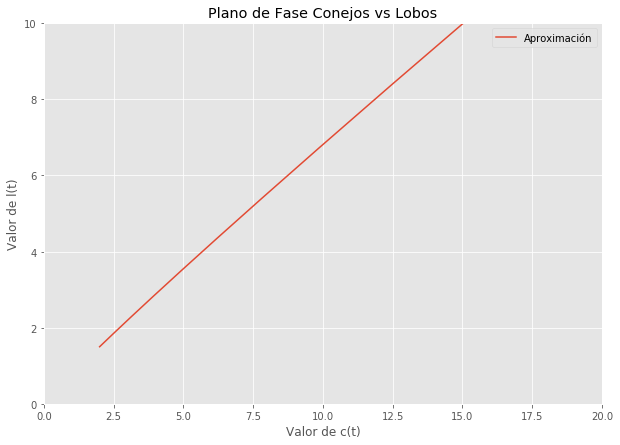

In [3]:
# PLANO DE FASE
plt.figure(figsize=(10,7))
plt.plot(c, l, '-', label="Aproximación")
plt.xlabel("Valor de c(t)")
plt.ylabel("Valor de l(t)")
plt.title("Plano de Fase Conejos vs Lobos" )
plt.xlim((0, 20))
plt.ylim((0, 10))
plt.legend(loc="best")
plt.show()

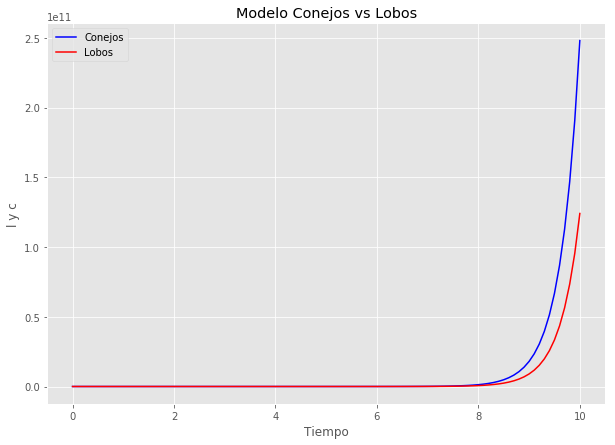

In [4]:
# Graficas de las soluciones en función de t
plt.figure(figsize=(10,7))
plt.plot(t, c, 'b-', label="Conejos")
plt.plot(t, l, '-r', label="Lobos")
plt.xlabel("Tiempo")
plt.ylabel("l y c")
plt.title("Modelo Conejos vs Lobos")
plt.legend(loc="best")
plt.show()

## Ejercicio 2

Consideremos el siguiente modelo de masa-resorte-amortiguamiento (MRA) en dimensión 1. En este sitema, $m$ es la masa del bloque, $c$ es el coeficiente de amortiguamiento y $k$ es la constante de elasticidad del resorte (ver figura). Un amortiguador es un mecanismo que disipa energía en el sistema resistiendo la velocidad. La relación entre aceleración, velocidad y desplazamento se puede expresar con la sigiente EDO:
 
 $$my''(t)+cy'(t)+ky(t)=0 $$
o de manera equivalente:

$$y''=\frac{-(cy'+ky)}{m}. $$

Denotaremos por $S$ el estado del sistema MRA, con $S=[y,v]$ donde $y$ es el desplazamiento de la masa con respecto a su configuración de resistencia y $v$ su velocidad. 

1. Reescribir el sistema MRA en forma de EDO de primer orden en términos del estado $S$.
2. Escribir una función mra$(t, S, m, c, k)$ donde $t$ es un escalar que representa el tiempo, $S$ es el estado del sistema, $m, c$ y $k$ son la masa, coeficiente de amortiguamiento y constante de elasticidad respectivamente y que devuelva $dS$. 
3. Resolver la EDO y graficar la solución para $m=1$, $k=10$ y $c=0$ (sin amortiguamiento), $c=1$ y $c=10$ (En total son tres gráficas).

  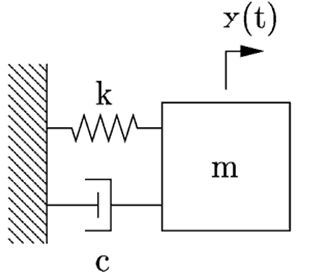

Se agrega una nueva variable $v=y'$ entonces $v'=y''$ yse puede sustituir el valor de $y''=\frac{-(cy'+ky)}{m}$
$$v'=\frac{-(cy'+ky)}{m}=\frac{-(cv+ky)}{m}$$ y se obtiene el sistema de dos ecuaciones de primer orden:

\begin{align*}
y'&=v\\
v'&=-\frac{c}{m}v-\frac{k}{m}y
 \end{align*}

O en forma matricial en términos del estado $S$:
$$
\begin{bmatrix}
y'\\ 
v'
\end{bmatrix} = \begin{bmatrix}
0 & 1\\ 
-\frac{k}{m} & -\frac{c}{m} 
\end{bmatrix}\begin{bmatrix}
y\\ 
v
\end{bmatrix}
$$

$$dS=AS$$

In [5]:
def mra(t,S,m,c,k):
    return (S[1], -c/m*S[1]-k/m*S[0])

# Tomando ejemplo; S=[1,1]
mra(t=1,S=[1,1],m=10,c=1,k=10)

(1, -1.1)

## $c=0$
Al resolver la EDO y graficar la solución para $m=1$, $k=10$ y $c=0$ (sin amortiguamiento) el sistema toma la forma:
\begin{align*}
y'&=v\\
v'&=-10y
 \end{align*}


Tiempo Aproximación c(t)  Aproximación l(t) 
  0.00   2.00   1.50
  0.10   2.15  -0.50
  0.20   2.10  -2.65
  0.30   1.83  -4.75
  0.40   1.36  -6.58
  0.50   0.70  -7.95
  0.60  -0.09  -8.65
  0.70  -0.96  -8.55
  0.80  -1.81  -7.60
  0.90  -2.57  -5.78
  1.00  -3.15  -3.21
  1.10  -3.47  -0.06
  1.20  -3.48   3.41
  1.30  -3.14   6.89
  1.40  -2.45  10.03
  1.50  -1.44  12.47
  1.60  -0.20  13.92
  1.70   1.19  14.12
  1.80   2.61  12.92
  1.90   3.90  10.32
  2.00   4.93   6.42
  2.10   5.57   1.49
  2.20   5.72  -4.08
  2.30   5.31  -9.80
  2.40   4.33 -15.12
  2.50   2.82 -19.45
  2.60   0.88 -22.27
  2.70  -1.35 -23.14
  2.80  -3.67 -21.79
  2.90  -5.85 -18.13
  3.00  -7.66 -12.28
  3.10  -8.89  -4.62
  3.20  -9.35   4.26
  3.30  -8.92  13.61
  3.40  -7.56  22.53
  3.50  -5.31  30.09
  3.60  -2.30  35.40
  3.70   1.24  37.70
  3.80   5.01  36.46
  3.90   8.66  31.45
  4.00  11.80  22.79
  4.10  14.08  10.98
  4.20  15.18  -3.10
  4.30  14.87 -18.28
  4.40  13.04 -33.15
  4.50   9

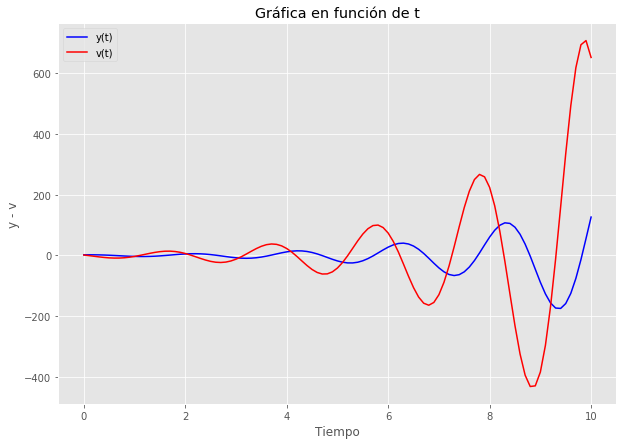

In [6]:
# Intervalo de tiempo [0,10]
t0=0
tf=10

# número de pasos
n=100

# Condiciones iniciales
y0=2.0
v0=1.5

# Tamaño del paso
h = (tf-t0)/n

t = np.linspace(t0, tf, n+1)
y = np.zeros(n+1)
v = np.zeros(n+1)

y[0] = c0
v[0] = l0

for i in range(0,n):
    y[i+1] = y[i] + h*(v[i])
    v[i+1] = v[i] + h*(-10*y[i])


print("Tiempo","Aproximación c(t) ","Aproximación l(t) ")
for i in range(n+1):
    print ("%6.2f %6.2f %6.2f" % (t[i], y[i], v[i]))
    
    
# Graficas de las soluciones en función de t
plt.figure(figsize=(10,7))
plt.plot(t, y, 'b-', label="y(t)")
plt.plot(t, v, '-r', label="v(t)")
plt.xlabel("Tiempo")
plt.ylabel("y - v")
plt.title("Gráfica en función de t")
plt.legend(loc="best")
plt.show()

## $c=1$
Al resolver la EDO y graficar la solución para $m=1$, $k=10$ y $c=1$ (sin amortiguamiento) el sistema toma la forma:
\begin{align*}
y'&=v\\
v'&=-v-10y
 \end{align*}


Tiempo Aproximación c(t)  Aproximación l(t) 
  0.00   2.00   1.50
  0.10   2.15  -0.65
  0.20   2.08  -2.74
  0.30   1.81  -4.55
  0.40   1.36  -5.90
  0.50   0.77  -6.67
  0.60   0.10  -6.77
  0.70  -0.58  -6.19
  0.80  -1.20  -5.00
  0.90  -1.70  -3.30
  1.00  -2.03  -1.27
  1.10  -2.15   0.88
  1.20  -2.07   2.95
  1.30  -1.77   4.72
  1.40  -1.30   6.02
  1.50  -0.70   6.71
  1.60  -0.03   6.74
  1.70   0.65   6.09
  1.80   1.26   4.83
  1.90   1.74   3.09
  2.00   2.05   1.04
  2.10   2.15  -1.11
  2.20   2.04  -3.15
  2.30   1.73  -4.88
  2.40   1.24  -6.12
  2.50   0.63  -6.75
  2.60  -0.05  -6.70
  2.70  -0.72  -5.98
  2.80  -1.32  -4.67
  2.90  -1.78  -2.89
  3.00  -2.07  -0.82
  3.10  -2.15   1.34
  3.20  -2.02   3.36
  3.30  -1.68   5.04
  3.40  -1.18   6.22
  3.50  -0.56   6.78
  3.60   0.12   6.66
  3.70   0.79   5.87
  3.80   1.37   4.50
  3.90   1.82   2.67
  4.00   2.09   0.58
  4.10   2.15  -1.56
  4.20   1.99  -3.56
  4.30   1.64  -5.19
  4.40   1.12  -6.31
  4.50   0

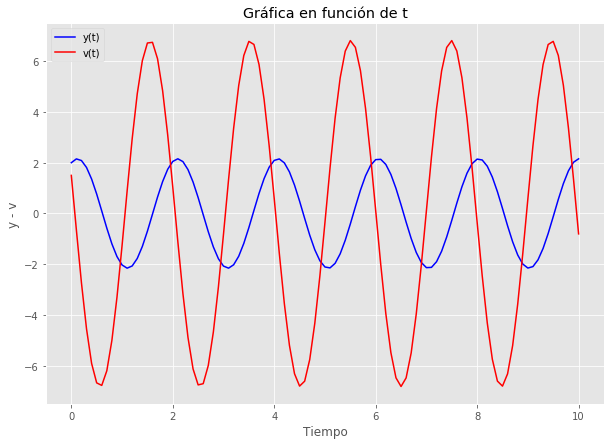

In [7]:
# Intervalo de tiempo [0,10]
t0=0
tf=10

# número de pasos
n=100

# Condiciones iniciales
y0=2.0
v0=1.5

# Tamaño del paso
h = (tf-t0)/n

t = np.linspace(t0, tf, n+1)
y = np.zeros(n+1)
v = np.zeros(n+1)

y[0] = c0
v[0] = l0

for i in range(0,n):
    y[i+1] = y[i] + h*(v[i])
    v[i+1] = v[i] + h*(-v[i]-10*y[i])


print("Tiempo","Aproximación c(t) ","Aproximación l(t) ")
for i in range(n+1):
    print ("%6.2f %6.2f %6.2f" % (t[i], y[i], v[i]))
    
    
# Graficas de las soluciones en función de t
plt.figure(figsize=(10,7))
plt.plot(t, y, 'b-', label="y(t)")
plt.plot(t, v, '-r', label="v(t)")
plt.xlabel("Tiempo")
plt.ylabel("y - v")
plt.title("Gráfica en función de t")
plt.legend(loc="best")
plt.show()

## $c=10$
Al resolver la EDO y graficar la solución para $m=1$, $k=10$ y $c=10$ (sin amortiguamiento) el sistema toma la forma:
\begin{align*}
y'&=v\\
v'&=-10v-10y
 \end{align*}


Tiempo Aproximación c(t)  Aproximación l(t) 
  0.00   2.00   1.50
  0.10   2.15  -2.00
  0.20   1.95  -2.15
  0.30   1.73  -1.95
  0.40   1.54  -1.73
  0.50   1.37  -1.54
  0.60   1.21  -1.37
  0.70   1.08  -1.21
  0.80   0.95  -1.08
  0.90   0.85  -0.95
  1.00   0.75  -0.85
  1.10   0.67  -0.75
  1.20   0.59  -0.67
  1.30   0.53  -0.59
  1.40   0.47  -0.53
  1.50   0.41  -0.47
  1.60   0.37  -0.41
  1.70   0.33  -0.37
  1.80   0.29  -0.33
  1.90   0.26  -0.29
  2.00   0.23  -0.26
  2.10   0.20  -0.23
  2.20   0.18  -0.20
  2.30   0.16  -0.18
  2.40   0.14  -0.16
  2.50   0.13  -0.14
  2.60   0.11  -0.13
  2.70   0.10  -0.11
  2.80   0.09  -0.10
  2.90   0.08  -0.09
  3.00   0.07  -0.08
  3.10   0.06  -0.07
  3.20   0.05  -0.06
  3.30   0.05  -0.05
  3.40   0.04  -0.05
  3.50   0.04  -0.04
  3.60   0.03  -0.04
  3.70   0.03  -0.03
  3.80   0.03  -0.03
  3.90   0.02  -0.03
  4.00   0.02  -0.02
  4.10   0.02  -0.02
  4.20   0.02  -0.02
  4.30   0.01  -0.02
  4.40   0.01  -0.01
  4.50   0

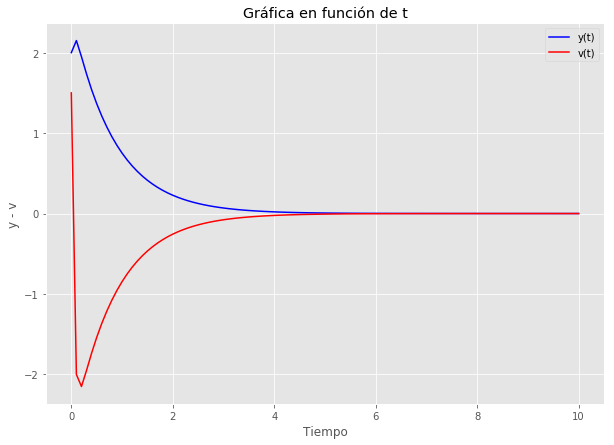

In [8]:
# Intervalo de tiempo [0,10]
t0=0
tf=10

# número de pasos
n=100

# Condiciones iniciales
y0=2.0
v0=1.5

# Tamaño del paso
h = (tf-t0)/n

t = np.linspace(t0, tf, n+1)
y = np.zeros(n+1)
v = np.zeros(n+1)

y[0] = c0
v[0] = l0

for i in range(0,n):
    y[i+1] = y[i] + h*(v[i])
    v[i+1] = v[i] + h*(-10*v[i]-10*y[i])


print("Tiempo","Aproximación c(t) ","Aproximación l(t) ")
for i in range(n+1):
    print ("%6.2f %6.2f %6.2f" % (t[i], y[i], v[i]))
    
    
# Graficas de las soluciones en función de t
plt.figure(figsize=(10,7))
plt.plot(t, y, 'b-', label="y(t)")
plt.plot(t, v, '-r', label="v(t)")
plt.xlabel("Tiempo")
plt.ylabel("y - v")
plt.title("Gráfica en función de t")
plt.legend(loc="best")
plt.show()

## Ejercicio 3

Resolver el siguiente problema de valor de frontera:

$$ y''+(1-0.2x)y^2=0$$ con $y(0)=0$ y $y(\pi/2)=1$

Graficar la solución.

Se transforma la ecuación de orden dos no lineal a un sistema de dos ecuaciones de orden uno no lineal
\begin{align*}
y'&=v\\
v'&=(0.2x-1)y^2
 \end{align*}
 
* y(0)=0
* v($\pi/2$))=1

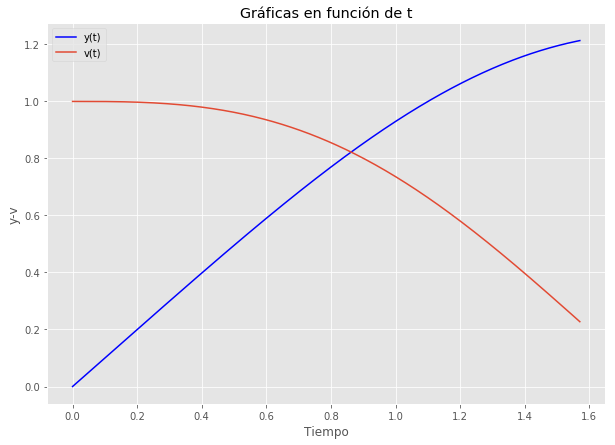

In [9]:
# Se utiliza la librería odeint para resvolver ecuacines difeenciales
from scipy.integrate import odeint

# Definicion de E.D a resolver
def df(s,x):
    y, v= s[0], s[1] #variables de paso
    dy=v  # derivada variable 1
    dv=(0.2*x-1)*y**2 # derivada variable 2
    return [dy,dv]

# Condiciones iniciales 
S0 = [0,1]

# Definicion del rango 
x = np.linspace(0,np.pi/2,500)

# solucion numerica
sol = odeint(df, S0, x)
y=sol[:,0] #toma el vector correspondiente a la solucion de y
v=sol[:,1] #toma el vector correspondiente a la solucion de v

# Gráfica
plt.figure(figsize=(10,7))
plt.plot(x,y, 'b-', label="y(t)")
plt.plot(x,v, label="v(t)")
plt.title("Gráficas en función de t")
plt.xlabel("Tiempo")
plt.ylabel("y-v")
plt.legend(loc="best")
plt.show()


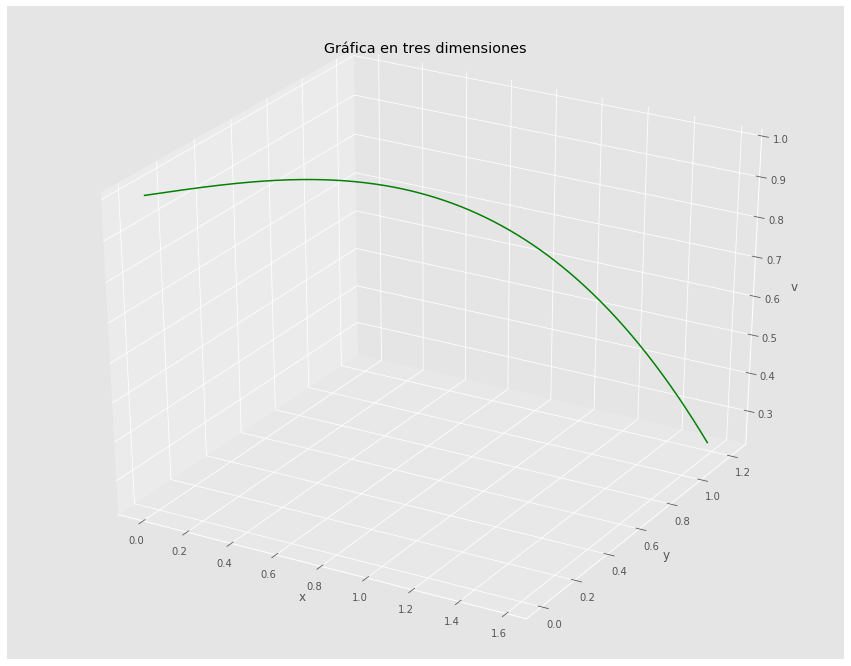

In [10]:
# Gráfica en tres dimensiones
from mpl_toolkits import mplot3d
 
fig = plt.figure(figsize=(15,12))
 
ax = plt.axes(projection ='3d')

# plotting
ax.plot3D(x, y, v, 'green')
ax.set_title('Gráfica en tres dimensiones')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("v")
plt.show()

## Ejercicio 4

Resolver y graficar el siguiente problema de valor de frontera:

$$4y''-2y'+y+x=0$$ con $y(0)=1$ y $y(20)=10$


Dada la ecuación
$$ 4y''-2y'+y=-x$$


Resolvemos la ecuación homogénea asociada 
$$ 4y''-2y'+y=0$$

Se propone una solució de la forma $y=e^{rx}$ y al sustituir obtenemos:
$$ 4r^2e^{rx}-2re^{rx}+e^{rx}=0$$
$$ 4r^2-2r+1=0$$
Se obtiene una ecuación de segundo grado que se puede resolver con la ecuación general de segundo grado
$$r=\frac{-(-2)\pm \sqrt{4-4(4)(1)}}{2(4)}=\frac{1\pm \sqrt{3}i}{4}$$

Con esto la solución de la ecuación no homogénea es:
$$y(t) = c_1 e^{t/4} sen \left (  \frac{\sqrt{3}t}{4} \right ) + c_2 e^{t/4} \cos \left (  \frac{\sqrt{3}t}{4} \right )$$

Y para la parte no homogénea se propone un polinomio de grado uno y se determinan sus coeficientes así la solución general es:
$$y(t) = c_1 e^{t/4} sen \left (  \frac{\sqrt{3}t}{4} \right ) + c_2 e^{t/4} \cos \left (  \frac{\sqrt{3}t}{4} \right ) -t -2$$

Utilizando las condiciones de valores en la frontera se determinan las constantes $c_1$ y $c_2$


\begin{align*}
c_1 e^{0/4} sen \left ( 0 \right ) + c_2 e^{0/4} \cos \left (  0 \right ) -0-2&= 1\\
c_1 e^{5} sen \left (  5\sqrt{3} \right ) + c_2 e^{5} \cos \left (  5\sqrt{3} \right ) -20-2 &= 10
\end{align*}





\begin{align*}
c_1 e^{0/4} sen \left ( 0 \right ) + c_2 e^{0/4} \cos \left (  0 \right ) -0-2 &= 1 \Rightarrow c_2=3\\
c_1 e^{5} sen(  5\sqrt{3} )+ c_2 e^{5} \cos (  5\sqrt{3} )  &= 32 \Rightarrow c_1=\frac{32-  3e^{5} \cos (  5\sqrt{3} ) }{e^{5} sen(  5\sqrt{3} )}
\end{align*}





$$y(t) = \left( \frac{32-  3e^{5} \cos (  5\sqrt{3} ) }{e^{5} sen(  5\sqrt{3} )} \right) e^{t/4} sen \left (  \frac{\sqrt{3}t}{4} \right ) + 3 e^{t/4} \cos \left (  \frac{\sqrt{3}t}{4} \right ) -t -2$$

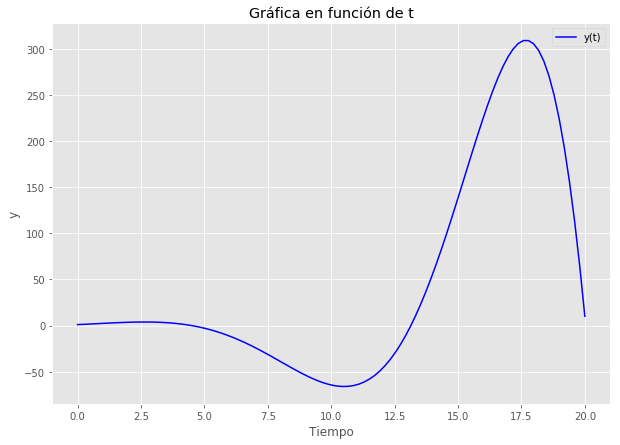

In [11]:
# Graficas de la solucion en función de t
c1 = (32-3*np.exp(5)*np.cos(5*np.sqrt(3)))/(np.exp(5)*np.sin(5*np.sqrt(3)))
c2 = 3

t=np.linspace(0,20,100)
y = c1 * np.exp(t/4)*np.sin(np.sqrt(3)*t/4) + c2 * np.exp(t/4)*np.cos(np.sqrt(3)*t/4) - t -2

plt.figure(figsize=(10,7))
plt.plot(t, y, 'b-', label="y(t)")
plt.xlabel("Tiempo")
plt.ylabel("y")
plt.title("Gráfica en función de t")
plt.legend(loc="best")
plt.show()